# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


In [55]:
# Parameters
m = 3
A = 0.001#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

In [56]:
res=m;
N=2.0^m*500/5.0
Xf=1.0;

dx=Xf/N;
dt=round(dx,digits=10);
Nt=2.0^m*500.0/5.0
Tf=Nt*dt; #final time
print(Tf)

1.0

In [57]:
print(N)

800.0

In [58]:
println("dx =", dx)
println("dt =", dt)
println("dx/dt =", dx/dt)

dx =0.00125
dt =0.00125
dx/dt =1.0


In [59]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"
#global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [60]:
include("./ScalarField.jl");

In [61]:
ori=0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
##initX1=chebishev(N)
##initX1=doublegrid(grid1)
##L=N+6

##initX = zeros(L)
##initX[4:L-3]=initX1
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

step size is  0.00125
the time step is 0.00125


In [62]:
qq=chebishev_cut(initX1);
#print(qq)
yy=chebishev_cut(initderpsi[4:L-3]);
derpsi_func = Spline1D(qq, yy,  k=4);
plot(qq, derpsi_func(qq).-init_gaussian_der(qq,r0,sigma,A))

LoadError: BoundsError: attempt to access 407-element Vector{Float64} at index [4:804]

In [63]:
"""aux=doublegrid(qq)
derpsi_func(aux);

using Plots
plot(aux, derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A), xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])"""

"aux=doublegrid(qq)\nderpsi_func(aux);\n\nusing Plots\nplot(aux, derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A), xaxis=\"x\",title=\"Initial Data\", labels=[\"m\" \"beta\" \"psi\" \"psi,x\"])"

# Initial data of m β Ψ and Ψ,x

In [64]:
using Dierckx

####

initm=zeros(L);
initbeta=zeros(L);
initpsi=zeros(L);
initderpsi=zeros(L);

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.01#0.7#0.3
sigma=0.3
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array = ghost(state_array)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

#derpsi_func = Spline1D(initX[4:L-3], initderpsi[4:L-3],  k=4);
derpsi_func = Spline1D(chebishev_cut(initX[4:L-3]), chebishev_cut(initderpsi[4:L-3]),  k=4);

In [65]:
"""y0=0
psi=rungekutta4(psi_RHS,y0,initX1,derpsi_func)
plot(initX1, psi)"""

"y0=0\npsi=rungekutta4(psi_RHS,y0,initX1,derpsi_func)\nplot(initX1, psi)"

In [66]:
"""aux=doublegrid(initX1)
derpsi_func(aux);

using Plots
plot(aux, derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A), xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])#, ylim=[0, 10^(-13)])"""

"aux=doublegrid(initX1)\nderpsi_func(aux);\n\nusing Plots\nplot(aux, derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A), xaxis=\"x\",title=\"Initial Data\", labels=[\"m\" \"beta\" \"psi\" \"psi,x\"])#, ylim=[0, 10^(-13)])"

In [67]:
"""x1=aux
y1=derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A)"""

"x1=aux\ny1=derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A)"

In [68]:
"""x2=aux
y2=derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A)"""

"x2=aux\ny2=derpsi_func(aux).-init_gaussian_der(aux,r0,sigma,A)"

In [69]:
"""

double_resolution=y2
basis_resolution=y1
xs = ( x1, x2 )
ys = ( basis_resolution, double_resolution*16*4 )
p = plot()
map(x->plot!(x[1],x[2],xaxis="x",title="Interpolation error", legend=false), zip(xs, ys))
display(p)
     
"""

"\ndouble_resolution=y2\nbasis_resolution=y1\nxs = ( x1, x2 )\nys = ( basis_resolution, double_resolution*16*4 )\np = plot()\nmap(x->plot!(x[1],x[2],xaxis=\"x\",title=\"Interpolation error\", legend=false), zip(xs, ys))\ndisplay(p)\n     \n"

In [70]:
y0=[0 0 0]
state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:])

"""y0=[0]
state_array[4:L-3,3] = n_rk4wrapper(psi_RHS,y0,initX[4:L-3],0,derpsi_func,state_array[4:L-3,:])
"""
state_array = ghost(state_array);

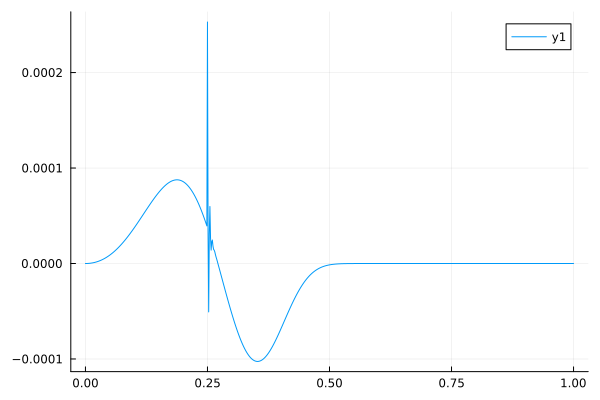

In [75]:
plot(initX1, derpsi_func(initX1))

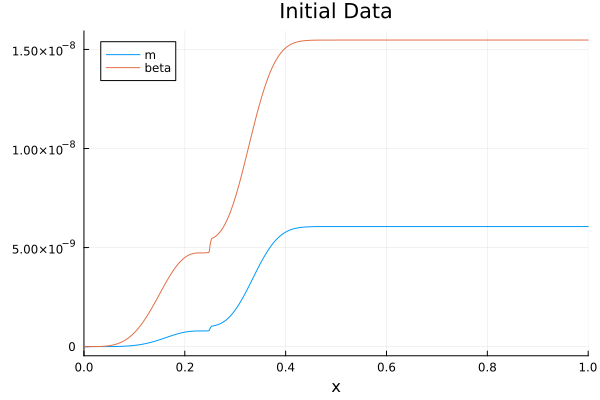

In [71]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:2], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"],xlim=[0,1])

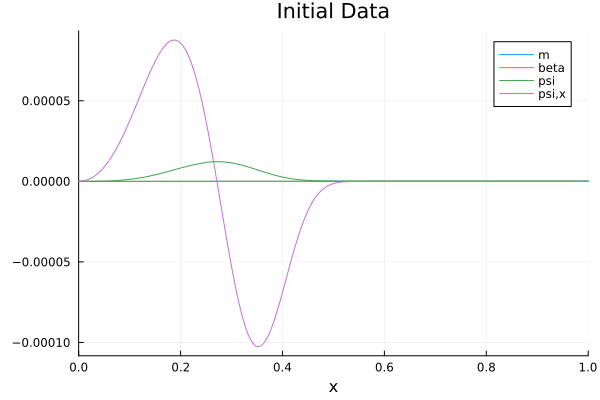

In [72]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,x"],xlim=[0,1])

In [73]:
#state_array[4:L-3,5]=DDer_array(state_array,4,initX);

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [54]:
using CSV, Tables
#CSV.write(dir*"/time_step0.csv", Tables.table(transpose(Matrix(state_array))), writeheader=false)
CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2/time_step0.csv"

In [76]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
monitor_ratio = zeros(L)
CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/parameters.csv"

In [77]:
ginit=dt_scale(initX,state_array[:,1],state_array[:,2],dx)
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

1.0


# DDer

In [78]:
aux=zeros(L-6)
i=1
j=4
for xx in initX1
    
    aux[i] = DDer(state_array,j,4,initX)
    i=i+1
    j=j+1
end

In [973]:
aux2=zeros(L-6)
i=1
j=4
newdata=zeros(L,4)
newdata[4:L-3,4]=aux
for xx in initX1
    
    aux2[i] = DDer(newdata,j,4,initX)
    i=i+1
    j=j+1
end

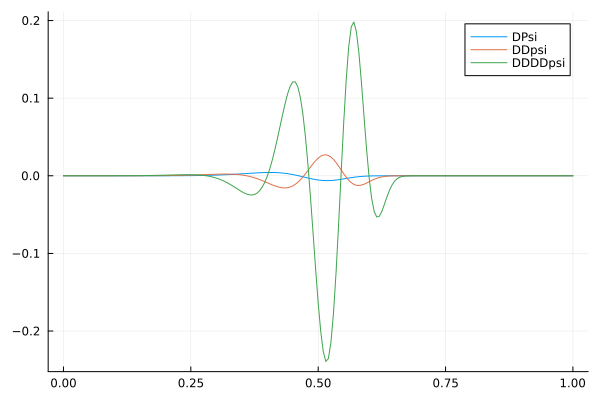

In [974]:
plot(initX1, [state_array[4:L-3,4] aux aux2],labels=["DPsi" "DDpsi" "DDDDpsi"])

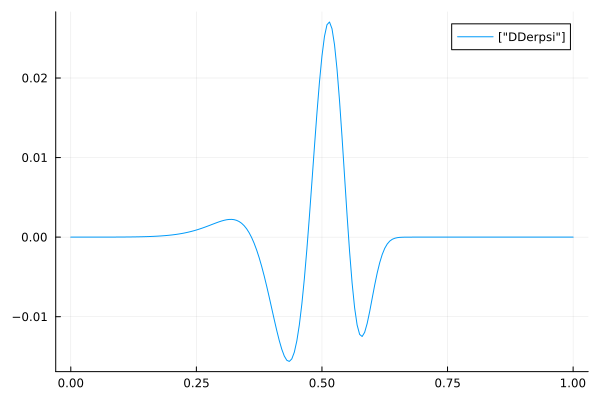

In [975]:
plot(initX1, aux,labels=["DDerpsi"])

 ## Time evolution

fixed grid

In [79]:
finaltime=1#0.9#0.8#0.04*5*4#length(T)-1
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);

iteration 1 dt is 0.005, time of iteration is 0.005
iteration 2 dt is 0.005, time of iteration is 0.01
iteration 3 dt is 0.005, time of iteration is 0.015
boom at time=0.015


 ## Movie of the evolution

[ Info: Saved animation to /home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res1.gif


Plots.AnimatedGif("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/anim_res1.gif")
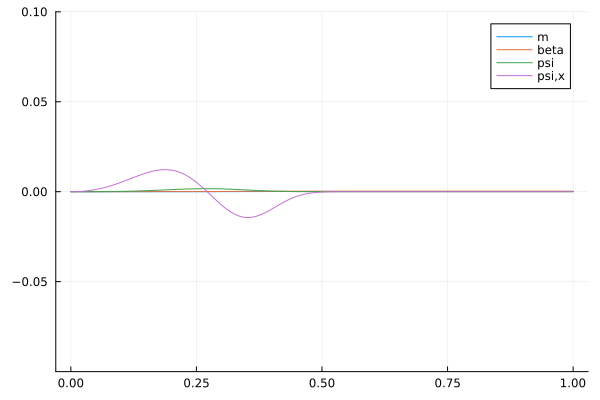

In [80]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 0:1:2
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], ylim=[-0.1, 0.1])#, xlim=[0, 0.1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 20)

In [432]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 10:10:290#length(T)-1
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 5)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res2/monitor_ratio10.csv" is not a valid file or doesn't exist

In [51]:
epsilon(dt,dx)

0.015625